In [37]:
from fastkaggle import get_dataset
from pathlib import Path
from fastai.tabular.all import *

In [38]:
path = Path('data/dbscan')
dataset = 'vjchoudhary7/customer-segmentation-tutorial-in-python'

In [39]:
if not path.exists():
    data = get_dataset(path, dataset, unzip=True)

In [40]:
df = pd.read_csv(path/'Mall_Customers.csv', low_memory=False)

In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


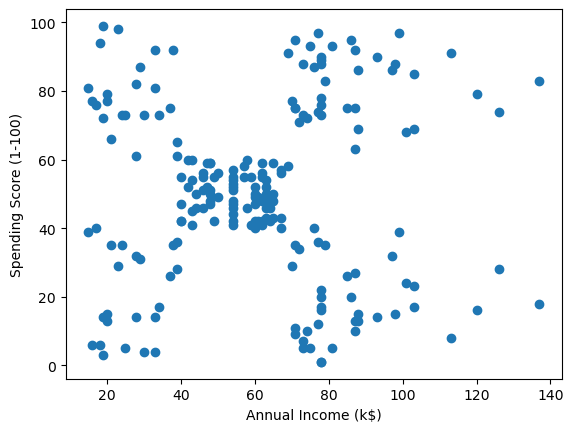

In [42]:
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
plt.scatter(x,y)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

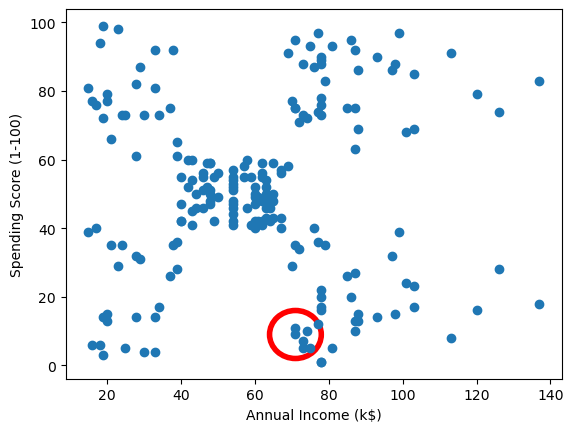

In [43]:
ex_pt = random.randint(0, 199)
from matplotlib.patches import Circle
circle1 = Circle((x[ex_pt], y[ex_pt]), 7, color='r', fill=False, linewidth=4)
fig, ax = plt.subplots()
ax.add_artist(circle1)
ax.scatter(x,y)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
plt.show()
plt.show()

## Explore the Neighborhood

Convert Dataframe to pytorch

In [44]:
x_y_tens = torch.from_numpy(df.to_numpy()[:,3:].astype(float)).to("cuda")

In [45]:
x_y_tens, x_y_tens[ex_pt]

(tensor([[ 15.,  39.],
         [ 15.,  81.],
         [ 16.,   6.],
         [ 16.,  77.],
         [ 17.,  40.],
         [ 17.,  76.],
         [ 18.,   6.],
         [ 18.,  94.],
         [ 19.,   3.],
         [ 19.,  72.],
         [ 19.,  14.],
         [ 19.,  99.],
         [ 20.,  15.],
         [ 20.,  77.],
         [ 20.,  13.],
         [ 20.,  79.],
         [ 21.,  35.],
         [ 21.,  66.],
         [ 23.,  29.],
         [ 23.,  98.],
         [ 24.,  35.],
         [ 24.,  73.],
         [ 25.,   5.],
         [ 25.,  73.],
         [ 28.,  14.],
         [ 28.,  82.],
         [ 28.,  32.],
         [ 28.,  61.],
         [ 29.,  31.],
         [ 29.,  87.],
         [ 30.,   4.],
         [ 30.,  73.],
         [ 33.,   4.],
         [ 33.,  92.],
         [ 33.,  14.],
         [ 33.,  81.],
         [ 34.,  17.],
         [ 34.,  73.],
         [ 37.,  26.],
         [ 37.,  75.],
         [ 38.,  35.],
         [ 38.,  92.],
         [ 39.,  36.],
         [ 

Define a threshold radius and a minimum sample

In [46]:
rad = 7.
min_sample = 3

In [47]:
x_y_tens[1], x_y_tens[ex_pt]

(tensor([15., 81.], device='cuda:0', dtype=torch.float64),
 tensor([71.,  9.], device='cuda:0', dtype=torch.float64))

In [48]:
((x_y_tens[1] - x_y_tens[ex_pt])**2).sqrt().sum()

tensor(128., device='cuda:0', dtype=torch.float64)

Euclidean Distance between a single x,y coordinate and every other point

In [49]:
dist_tens = ((x_y_tens - x_y_tens[ex_pt])**2).sqrt().sum(1)
dist_tens, dist_tens.shape

(tensor([ 86., 128.,  58., 123.,  85., 121.,  56., 138.,  58., 115.,  57., 142.,
          57., 119.,  55., 121.,  76., 107.,  68., 137.,  73., 111.,  50., 110.,
          48., 116.,  66.,  95.,  64., 120.,  46., 105.,  43., 121.,  43., 110.,
          45., 101.,  51., 100.,  59., 116.,  59.,  84.,  51.,  88.,  77.,  69.,
          64.,  64.,  72.,  80.,  73.,  79.,  64.,  60.,  68.,  64.,  67.,  62.,
          72.,  71.,  67.,  74.,  65.,  73.,  64.,  62.,  73.,  61.,  68.,  55.,
          61.,  68.,  55.,  62.,  61.,  56.,  60.,  50.,  59.,  63.,  49.,  52.,
          65.,  54.,  63.,  60.,  64.,  50.,  58.,  44.,  51.,  42.,  44.,  54.,
          49.,  52.,  43.,  50.,  41.,  48.,  59.,  55.,  56.,  42.,  49.,  45.,
          42.,  47.,  51.,  53.,  40.,  44.,  45.,  47.,  40.,  56.,  38.,  52.,
          51.,  35.,  51.,  84.,  21.,  69.,  26.,  86.,   2.,  66.,   0.,  66.,
          26.,  63.,   6.,  81.,   4.,  66.,   4.,  66.,   8.,  88.,  36.,  83.,
           9.,  94.,  33.,  

Grab any indexes where the distance is less than or equal to radius

In [50]:
(dist_tens <= rad).float()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.], device='cuda:0')

Apply indexes

In [51]:
ex_neighborhood = x_y_tens[(dist_tens <= rad)]
ex_neighborhood

tensor([[71., 11.],
        [71.,  9.],
        [73.,  5.],
        [73.,  7.],
        [74., 10.]], device='cuda:0', dtype=torch.float64)

In [52]:
for coord in range(ex_neighborhood.shape[0]):
    x = int(ex_neighborhood[coord, 0])
    y = int(ex_neighborhood[coord, 1])

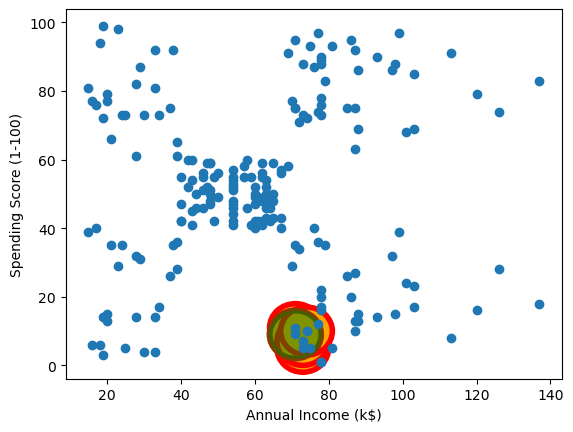

In [53]:
circle1 = Circle((x_y_tens[ex_pt, 0], x_y_tens[ex_pt, 1]), rad, color='red', fill=False, linewidth=4)
circle2 = Circle((x_y_tens[ex_pt, 0], x_y_tens[ex_pt, 1]), rad, color='green', linewidth=4, alpha=0.5)
fig, ax = plt.subplots()
for coord in range(ex_neighborhood.shape[0]):
    x = int(ex_neighborhood[coord, 0])
    y = int(ex_neighborhood[coord, 1])
    fill_circle = Circle((x, y), rad, color="orange", linewidth=2)
    rad_circle = Circle((x, y), rad, color="red", fill=False, linewidth=4)
    ax.add_artist(fill_circle)
    ax.add_artist(rad_circle)
x = list(x_y_tens[:,0].detach().cpu().numpy())
y = list(x_y_tens[:,1].detach().cpu().numpy())
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.scatter(x,y)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
plt.show()
plt.show()

Combine into a function that gets the neighborhood for a single point

In [59]:
x_y_tens[ex_pt]

tensor([71.,  9.], device='cuda:0', dtype=torch.float64)

In [54]:
def pt_neighborhood(pt, tens, rad=7.):
    dist = ((tens - tens[pt])**2).sqrt().sum(1)
    return tens[(dist <= rad)]

In [55]:
pt_neighborhood(ex_pt, x_y_tens)

tensor([[71., 11.],
        [71.,  9.],
        [73.,  5.],
        [73.,  7.],
        [74., 10.]], device='cuda:0', dtype=torch.float64)

## Find Core Points

Check each point in neighborhood and see if it's own neighborhood is >= num_sample

In [62]:
ex_pt_neighborhood = pt_neighborhood(ex_pt, x_y_tens)

In [75]:
ex_pt_neighborhood[0]

tensor([71., 11.], device='cuda:0', dtype=torch.float64)

In [78]:
ex_pt_neighborhood[1]

tensor([71.,  9.], device='cuda:0', dtype=torch.float64)

In [80]:
for i, pt in enumerate(ex_pt_neighborhood):
    neighborhood = pt_neighborhood(i, ex_pt_neighborhood)


tensor([[71., 11.],
        [71.,  9.],
        [73.,  7.],
        [74., 10.]], device='cuda:0', dtype=torch.float64)
tensor([[71., 11.],
        [71.,  9.],
        [73.,  5.],
        [73.,  7.],
        [74., 10.]], device='cuda:0', dtype=torch.float64)
tensor([[71.,  9.],
        [73.,  5.],
        [73.,  7.],
        [74., 10.]], device='cuda:0', dtype=torch.float64)
tensor([[71., 11.],
        [71.,  9.],
        [73.,  5.],
        [73.,  7.],
        [74., 10.]], device='cuda:0', dtype=torch.float64)
tensor([[71., 11.],
        [71.,  9.],
        [73.,  5.],
        [73.,  7.],
        [74., 10.]], device='cuda:0', dtype=torch.float64)


Loop through all of the points and see how many of them are core points

A core point will have in it's radius a `min_sample` of other points

given a circle around a point, find out what other samples are in that coordinate space

In [ ]:
import numpy

def dbscan(D, eps, MinPts):
    '''
    Cluster the dataset `D` using the DBSCAN algorithm.
    
    dbscan takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    '''
 
    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the 
    # cluster growth is all handled by the 'expandCluster' routine.
    
    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue
        
        # Find all of P's neighboring points.
        NeighborPts = region_query(D, P, eps)
        
        # If the number is below MinPts, this point is noise. 
        # This is the only condition under which a point is labeled 
        # NOISE--when it's not a valid seed point. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to 
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
           C += 1
           grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    '''
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `NeighborPts` - All of the neighbors of `P`
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    '''

    # Assign the cluster label to the seed point.
    labels[P] = C
    
    # Look at each neighbor of P (neighbors are referred to as Pn). 
    # NeighborPts will be used as a FIFO queue of points to search--that is, it
    # will grow as we discover new branch points for the cluster. The FIFO
    # behavior is accomplished by using a while-loop rather than a for-loop.
    # In NeighborPts, the points are represented by their index in the original
    # dataset.
    i = 0
    while i < len(NeighborPts):    
        
        # Get the next point from the queue.        
        Pn = NeighborPts[i]
       
        # If Pn was labelled NOISE during the seed search, then we
        # know it's not a branch point (it doesn't have enough neighbors), so
        # make it a leaf point of cluster C and move on.
        if labels[Pn] == -1:
           labels[Pn] = C
        
        # Otherwise, if Pn isn't already claimed, claim it as part of C.
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C).
            labels[Pn] = C
            
            # Find all the neighbors of Pn
            PnNeighborPts = region_query(D, Pn, eps)
            
            # If Pn has at least MinPts neighbors, it's a branch point!
            # Add all of its neighbors to the FIFO queue to be searched. 
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
            # If Pn *doesn't* have enough neighbors, then it's a leaf point.
            # Don't queue up it's neighbors as expansion points.
            #else:
                # Do nothing                
                #NeighborPts = NeighborPts               
        
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def region_query(D, P, eps):
    '''
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    '''
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if numpy.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors